In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
import csv

In [2]:
#data
H3K9ac_=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all_ac.csv")
H3K9ac=H3K9ac_.loc[(H3K9ac_ != 0).all(axis=1), :] #remove row with zeros
H3K9ac=H3K9ac.reset_index() #reset index
H3K9ac.drop(["index"],axis=1,inplace=True)


In [3]:
folder="/home/bguzman/jupyter/UI/YMC/results/predictions_jan27_with_vo2/"
T1= pd.read_csv(folder+"T1_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T2= pd.read_csv(folder+"T2_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T3= pd.read_csv(folder+"T3_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T4= pd.read_csv(folder+"T4_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T5= pd.read_csv(folder+"T5_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T6= pd.read_csv(folder+"T6_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T7= pd.read_csv(folder+"T7_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T8= pd.read_csv(folder+"T8_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T9= pd.read_csv(folder+"T9_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T10= pd.read_csv(folder+"T10_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T11= pd.read_csv(folder+"T11_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T12= pd.read_csv(folder+"T12_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T13= pd.read_csv(folder+"T13_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T14= pd.read_csv(folder+"T14_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T15= pd.read_csv(folder+"T15_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
T16=pd.read_csv(folder+"T16_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()

In [4]:
lista_csv=[T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16]
lista_time=["T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16"]

In [5]:
#list of predictions of fluxes 
lista_glc=[]
lista_PAC=[]
lista_PME=[]

def buscar_posicion(file_csv,name_reaction):

    for posicion,name in file_csv["Unnamed: 0"].items():
        if name== name_reaction :
            return (posicion)
    return ("Not found")

def buscar_valor(file_csv,name_reaction):
    posicion= buscar_posicion(file_csv,name_reaction)
    return file_csv["0"][posicion]

for name_csv in lista_csv:
    lista_PAC.append(buscar_valor(name_csv,"R_EX_PAC"))
    lista_glc.append(abs(buscar_valor(name_csv,"R_EX_glc__D_e")))
    lista_PME.append(abs(buscar_valor(name_csv,"R_EX_PME")))
    

print(lista_glc)
print(lista_PME)
print(lista_PAC)


[596.7702374076758, 543.5011958852741, 510.82955203701255, 607.715204406946, 499.94815788262906, 524.4731894435732, 509.5767286898051, 537.1744519447184, 542.9851656926411, 551.9482634919675, 587.545699333793, 616.5102330569965, 632.5437269561717, 583.8657672006324, 643.5909553241132, 654.0469035702254]
[0.5791877416546064, 0.3398696430318063, 0.4616425340443427, 0.8392737221027987, 0.5212507854252298, 0.4587048010233228, 0.4406974823595238, 0.5980936454839709, 0.5863228395152401, 0.8359763598418771, 0.7799209624099094, 0.7833625878576876, 0.4777536952136335, 0.459640488835101, 0.557069292482077, 0.5670938369282482]
[1.3618574500763931, 1.1266512428664162, 1.1873773996960912, 0.992609111507898, 0.6414014593817745, 0.6477292511982041, 0.7664586791438122, 0.8092514956480499, 0.7729665110734303, 0.8987824045186013, 1.1474207800396024, 1.6233058033327843, 1.4204432019549538, 1.50724413764626, 1.723855610185207, 1.6686049391098023]


In [6]:
dict = {'T1': lista_PAC[0], 'T2': lista_PAC[1], 'T3': lista_PAC[2], 'T4': lista_PAC[3],'T5': lista_PAC[4],'T6': lista_PAC[5],'T7':lista_PAC[6],'T8':lista_PAC[7],'T9':lista_PAC[8],'T10': lista_PAC[9],'T11': lista_PAC[10],'T12': lista_PAC[11],'T13':lista_PAC[12],'T14': lista_PAC[13],'T15': lista_PAC[14],'T16':lista_PAC[15]} 
ACOA = pd.DataFrame([dict]) 
ACOA.index = ['EX_Pac']
ACOA

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16
EX_Pac,1.361857,1.126651,1.187377,0.992609,0.641401,0.647729,0.766459,0.809251,0.772967,0.898782,1.147421,1.623306,1.420443,1.507244,1.723856,1.668605


In [8]:
#change columns for detailed times
time=["Genes","50.5","50.9","51.08","51.18","51.34","51.51","51.68","51.84","52.01","52.18","52.38","52.54","52.97","53.42","53.83","54.25"]
H3K9ac.columns = time
df_H3K9ac = H3K9ac.set_index('Genes')


In [9]:
#H3K9ac vectors for doing correlation with ACOA
lista_genes=[]
for k in range(H3K9ac.shape[0]):
    lista_genes.append(H3K9ac["Genes"][k])
#################################################

dicc_genes={}
for index, row in H3K9ac.iterrows(): 
    #print (row["T1"])
    if row["Genes"] not in dicc_genes:
        dicc_genes[row["Genes"]]=0
        
filas=H3K9ac.shape[0]
#################################################

dicc_genes={}
for i in range(filas):
    fila= (H3K9ac.iloc[i])
    lista_nueva=[]
    for elemento in fila:
        lista_nueva.append(elemento)
    dicc_genes[lista_nueva[0]]=lista_nueva[1::]
        

lista_vectores=[]
for i,k in dicc_genes.items():
    lista_vectores.append(k)
#lista_vectores   
               

In [10]:
#Correlation
def calculo_coeficiente_correlacion(a,b):
  """
  Calcula el coeficiente de correlación dados 
  dos vectores a y b.

  Esta función recibe "a" y "b" como listas
  """
  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
  array_a = np.array(a)
  array_b = np.array(b)

  #calcula los promedios de los vectores a y b
  promedio_a = np.mean(a)
  promedio_b = np.mean(b)

  #Calcula las distancias de cada dato puntual respecto a su media
  distancia_a = a-promedio_a*np.array([1]*len(a))
  distancia_b = b-promedio_b*np.array([1]*len(b))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
  numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
  norma_a = np.linalg.norm(distancia_a)
  norma_b = np.linalg.norm(distancia_b)

  denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
  coef_corr = numerador/denominador
  return coef_corr

#Agregar vectores
lista_corr=[]
for i in range(len(lista_vectores)):
    lista_corr.append(calculo_coeficiente_correlacion(lista_vectores[i],np.array(ACOA)[0]))

#lista_corr

In [11]:
#dfc contains coef corr of all genes 
dfc_ACOA=pd.DataFrame(lista_corr,index =H3K9ac["Genes"],columns = ['Coef_correlation'])


#dfi_hc contains high corr. (0.7)  
dfi_R=df_H3K9ac
dfi_R['Coef_correlation']=dfc_ACOA['Coef_correlation']
hc_ac=df_H3K9ac[dfi_R['Coef_correlation']>= .7]

by_correlation_ac = hc_ac.sort_values('Coef_correlation',ascending=False)
by_correlation_ac.head()

,50.5,50.9,51.08,51.18,51.34,51.51,51.68,51.84,52.01,52.18,52.38,52.54,52.97,53.42,53.83,54.25,Coef_correlation
Genes,,,,,,,,,,,,,,,,,
YHR137W,404,295,331,227,168,191,209,211,248,284,389,387,471,456,503,505,0.945694
YMR102C,704,640,576,405,355,416,385,432,358,474,526,647,709,741,733,945,0.914860
YOR388C,518,509,471,355,246,308,285,332,370,364,559,564,581,531,542,605,0.913187
YPL277C,755,676,554,416,194,299,268,154,256,256,448,574,886,1091,1088,1071,0.904242
YNR067C,375,267,325,303,222,185,228,257,286,342,438,477,519,490,543,437,0.902806


In [12]:
#List of pvalue of all genes 
lista_pvalue=[]

for i in range(len(lista_vectores)):
    a=lista_vectores[i]
    b=np.array(ACOA)[0]
    lista_pvalue.append(linregress(a,b).pvalue)
    
#lista_pvalue

In [13]:
#pvalue of all genes
pvalue_ac=pd.DataFrame(lista_pvalue,index =H3K9ac["Genes"],columns = ['pvalue'])
#lp_ac contains coef de corr and pvalue more significant 
lp_ac=hc_ac
lp_ac['pvalue']=pvalue_ac['pvalue']
lp_ac=hc_ac[lp_ac['pvalue']<= .001]
lp_ac


,50.5,50.9,51.08,51.18,51.34,51.51,51.68,51.84,52.01,52.18,52.38,52.54,52.97,53.42,53.83,54.25,Coef_correlation,pvalue
Genes,,,,,,,,,,,,,,,,,,
YAL055W,670,691,610,287,382,503,520,410,422,435,589,698,835,865,912,752,0.851263,0.000029
YAL054C,333,408,281,118,100,130,174,133,233,284,301,211,274,410,391,474,0.742160,0.000995
YBL108C-A,205,151,95,113,122,116,118,65,162,166,168,221,197,187,189,208,0.751987,0.000780
YBL106C,405,337,407,329,327,301,302,266,318,392,443,428,449,420,411,393,0.775025,0.000421
YBL067C,841,809,683,407,367,427,338,354,394,444,500,591,771,976,907,1069,0.859077,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPL003W,1254,1658,1225,263,378,947,813,920,804,798,1265,1134,1187,1692,2044,2033,0.778372,0.000383
YPR006C,750,840,657,209,288,344,464,571,500,557,867,688,666,871,960,789,0.766744,0.000530
YPR025C,955,1183,985,525,403,667,517,548,480,526,886,724,781,1044,1475,1357,0.793414,0.000244


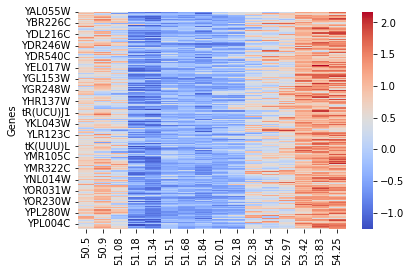

In [28]:
#heatmap of genes with high corr-ACoA vector
#dfv2=dfv.loc[~(dfv==0).all(axis=1)]
pv_norm_ac=lp_ac.apply(lambda x: (x-x.mean())/x.std(), axis = 1) #normalizacion
ax=sns.heatmap(pv_norm_ac.iloc[:,0:16], cmap=sns.color_palette("coolwarm", as_cmap=True)
)

plt.savefig("ACOA_H3K9ac.pdf")

In [15]:
#Names of genes with high corr y low pvalue:
for index,valor in lp_ac["pvalue"].items():
    print(index) 

YAL055W
YAL054C
YBL108C-A
YBL106C
YBL067C
YBR026C
YBR027C
YBR046C
YBR072W
YBR117C
YBR149W
YBR161W
YBR168W
YBR226C
YBR270C
YBR280C
YBR285W
YCL074W
YCR005C
YCR006C
tP(AGG)C
YCR091W
YCR108C
YDL223C
YDL222C
YDL221W
YDL216C
YDL215C
YDL214C
YDL160C
YDL159W
YDL149W
YDL022W
tQ(UUG)D1
YDR070C
YDR094W
YDR095C
YDR111C
YDR112W
YDR246W
YDR256C
YDR257C
YDR342C
YDR343C
YDR344C
YDR368W
YDR369C
YDR379C-A
YDR401W
YDR487C
YDR535C
YDR536W
YDR540C
YIL174W
YIL173W
YIL160C
YIL159W
YIL124W
YIL099W
YIL055C
YIL032C
YIL012W
YIR016W
YIR017W-A
YEL041W
YEL017W
YER014C-A
YER015W
YER054C
YER121W
YER184C
YFL061W
YFL021W
YFL015C
YFL014W
YFL013W-A
YGL209W
YGL205W
YGL153W
YGL080W
YGR051C
YGR052W
YGR066C
YGR088W
YGR127W
YGR174W-A
YGR225W
YGR230W
YGR236C
YGR243W
YGR244C
YGR248W
YGR266W
YGR270W
YGR270C-A
YHL046C
YHL045W
YHL041W
YHL032C
YHL030W-A
YHR033W
YHR073C-B
YHR096C
YHR132C
YHR137W
YHR138C
YHR139C
YHR213W
YHR213W-A
YJL222W
YJL216C
YJL215C
YJL214W
YJL163C
YJL153C
YJL047C-A
snR60
tR(UCU)J1
tD(GUC)J2
YJL045W
YJR008W
YJR01

In [16]:
print(len(lp_ac)) 

253


SAM

In [17]:
dict = {'T1': lista_PME[0], 'T2': lista_PME[1], 'T3': lista_PME[2], 'T4': lista_PME[3],'T5': lista_PME[4],'T6': lista_PME[5],'T7':lista_PME[6],'T8':lista_PME[7],'T9':lista_PME[8],'T10': lista_PME[9],'T11': lista_PME[10],'T12': lista_PME[11],'T13':lista_PME[12],'T14': lista_PME[13],'T15': lista_PME[14],'T16':lista_PME[15]} 
SAM = pd.DataFrame([dict]) 
SAM.index = ['EX_Pme']
SAM

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16
EX_Pme,0.579188,0.33987,0.461643,0.839274,0.521251,0.458705,0.440697,0.598094,0.586323,0.835976,0.779921,0.783363,0.477754,0.45964,0.557069,0.567094


In [18]:
H3K4me3_=pd.read_csv("/home/bguzman/jupyter/UI/YMC/analysis/dfi_T_all.csv")
H3K4me3=H3K4me3_.loc[(H3K4me3_ != 0).all(axis=1), :]
H3K4me3=H3K4me3.reset_index()
H3K4me3.drop(["index"],axis=1,inplace=True)


In [19]:
time=["Genes","50.5","50.9","51.08","51.18","51.34","51.51","51.68","51.84","52.01","52.18","52.38","52.54","52.97","53.42","53.83","54.25"]
H3K4me3.columns = time

In [20]:
#H3K4me3 vectors for doing correlation with SAM
lista_genes=[]
for k in range(H3K4me3.shape[0]):
    lista_genes.append(H3K4me3["Genes"][k])
#################################################

dicc_genes={}
for index, row in H3K4me3.iterrows(): 
    #print (row["T1"])
    if row["Genes"] not in dicc_genes:
        dicc_genes[row["Genes"]]=0
        
filas=H3K4me3.shape[0]
#################################################

dicc_genes={}
for i in range(filas):
    fila= (H3K4me3.iloc[i])
    lista_nueva=[]
    for elemento in fila:
        lista_nueva.append(elemento)
    dicc_genes[lista_nueva[0]]=lista_nueva[1::]
        

lista_vectores2=[]
for i,k in dicc_genes.items():
    lista_vectores2.append(k)
#lista_vectores2   
               

In [21]:
#Correlation
def calculo_coeficiente_correlacion(a,b):
  """
  Calcula el coeficiente de correlación dados 
  dos vectores a y b.

  Esta función recibe "a" y "b" como listas
  """
  #Crea los array a y b a partir de las listas
  #Esto, con el fin de hacer operaciones entre vectores
  array_a = np.array(a)
  array_b = np.array(b)

  #calcula los promedios de los vectores a y b
  promedio_a = np.mean(a)
  promedio_b = np.mean(b)

  #Calcula las distancias de cada dato puntual respecto a su media
  distancia_a = a-promedio_a*np.array([1]*len(a))
  distancia_b = b-promedio_b*np.array([1]*len(b))

  #Calcula el producto punto entre estas dos distancias
  #Que viene siendo el numerador de la ecuación de coeficientes de correlacion
  numerador = np.dot(distancia_a,distancia_b)

  #Calcula la norma de â y b̂
  #Construcción del denominador
  norma_a = np.linalg.norm(distancia_a)
  norma_b = np.linalg.norm(distancia_b)

  denominador = norma_a*norma_b

  #Calculo del coeficiente de correlación
  coef_corr = numerador/denominador
  return coef_corr

#Agregar vectores
lista_corr=[]
for i in range(len(lista_vectores2)):
    lista_corr.append(calculo_coeficiente_correlacion(lista_vectores2[i],np.array(SAM)[0]))

#lista_corr

In [22]:
df_H3K4me3=H3K4me3.set_index('Genes')
df_H3K4me3.head()

,50.5,50.9,51.08,51.18,51.34,51.51,51.68,51.84,52.01,52.18,52.38,52.54,52.97,53.42,53.83,54.25
Genes,,,,,,,,,,,,,,,,
R0010W,2891.698729,2651.767317,2238.534218,2279.430498,2219.623316,2218.503951,2340.882813,2398.774472,2720.798087,2573.865899,2709.974092,3332.814768,2811.313529,2517.813774,3564.464404,2930.047715
R0020C,16084.345230,15855.081138,14537.126001,13688.831403,13115.881364,12449.702628,13460.644903,12816.528991,13937.087019,12773.380097,14703.565465,14648.350820,14958.482923,14895.336514,17151.382851,15591.566122
R0030W,12778.991292,12322.722748,11443.374361,10705.116899,10458.077326,10609.947386,10983.267465,10292.177650,11006.448271,10369.055853,11985.056022,12520.643186,12522.393690,12018.032579,13952.011837,12369.839449
R0040C,15505.849975,15563.031388,15368.790923,15163.540871,15770.403149,15081.009448,15917.548147,15187.112738,15507.836046,15139.510891,15289.659600,14599.993828,15545.990077,16045.705026,14872.751743,14612.358191
YAL069W,84.752665,81.063239,81.125276,66.141455,74.671247,105.484838,111.470610,75.602401,70.286435,71.729162,72.550487,82.715907,78.028294,98.168467,83.266913,83.336845


In [23]:
#dfc contains coef corr of all genes 
dfc_SAM=pd.DataFrame(lista_corr,index =H3K4me3["Genes"],columns = ['Coef_correlation'])
df_H3K4me3=H3K4me3.set_index('Genes')

#dfi_hc contains coef. high corr. (0.7) 
dfi_R=H3K4me3.set_index('Genes')
dfi_R['Coef_correlation']=dfc_SAM['Coef_correlation']
hc_me=dfi_R[dfi_R['Coef_correlation']>= .7]

by_correlation_me = hc_me.sort_values('Coef_correlation',ascending=False)
by_correlation_me.head()

,50.5,50.9,51.08,51.18,51.34,51.51,51.68,51.84,52.01,52.18,52.38,52.54,52.97,53.42,53.83,54.25,Coef_correlation
Genes,,,,,,,,,,,,,,,,,
YHL008C,100.303613,93.278247,97.350331,116.359966,98.467578,92.195409,100.096058,117.888489,115.106770,134.142848,116.649803,124.710136,97.535367,102.316430,99.279781,100.383018,0.870835
YNL192W,386.441051,367.560713,375.269823,411.546828,361.868348,362.967513,363.985666,402.358539,365.693191,426.648781,401.161519,440.303135,371.781871,376.082014,385.910117,388.273938,0.859340
tA(AGC)D,129.850413,117.708265,110.958441,126.158700,125.546162,107.976606,102.370969,121.732679,120.199990,146.252966,149.368651,137.435661,126.222240,110.612357,115.292649,123.111249,0.785548
YGR007W,596.378845,569.663582,599.803651,625.894134,639.218693,605.499581,591.476707,620.195964,628.503339,675.371979,651.531829,675.725331,595.539478,593.158764,640.514718,664.800742,0.770990
YNL037C,534.952602,505.257173,568.400318,613.645717,544.033367,568.953653,586.926886,620.195964,658.044015,707.976143,638.728802,656.637045,527.838458,539.235240,491.595046,571.993801,0.746334


In [24]:
#List of pvalue of all genes 
lista_pvalue2=[]

for i in range(len(lista_vectores2)):
    a=lista_vectores2[i]
    b=np.array(SAM)[0]
    print((linregress(a,b).pvalue))
    
#lista_pvalue

0.4725656422155653
0.4371257508589905
0.5426419177309976
0.04959273610293626
0.021042946825948882
0.061845616359095724
0.45209827817798476
0.5717671822010082
0.35437323847979096
0.35437323847979096
0.225095249462466
0.6135495263530953
0.8211847717457752
0.636817148056685
0.36976048415367857
0.7222200783660784
0.34603881203458353
0.914498977588589
0.972364843364445
0.07236676120663252
0.2662950414734514
0.24174546645104797
0.2911782449479756
0.06956504005544291
0.5813897377436544
0.6998434194404791
0.48492727825030124
0.2937688590206745
0.20000394821828696
0.3094937256393893
0.558455039296023
0.7461525922952597
0.8214368263880578
0.7797602396550641
0.2846789832768922
0.22365297213697746
0.27118228773276676
0.10890204286501527
0.4193023075647565
0.3385292741804271
0.860669249537025
0.45102703652451814
0.0872790089070975
0.33034622502034505
0.6524906814295381
0.621307503760945
0.2529489478292401
0.27994286440761756
0.4483965257585566
0.7694870646379408
0.267360604236904
0.0897298972014854

In [25]:
#dfp contains pvalue of all genes
pvalue_me=pd.DataFrame(lista_pvalue,index =H3K4me3["Genes"],columns = ['pvalue'])
#lp_me contains coef de corr and pvalue more significant
lp_me=hc_me
lp_me['pvalue']=pvalue_me['pvalue']
lp_me=hc_me[lp_me['pvalue']<= .001]
lp_me

,50.5,50.9,51.08,51.18,51.34,51.51,51.68,51.84,52.01,52.18,52.38,52.54,52.97,53.42,53.83,54.25,Coef_correlation,pvalue
Genes,,,,,,,,,,,,,,,,,,
YHL008C,100.303613,93.278247,97.350331,116.359966,98.467578,92.195409,100.096058,117.888489,115.106770,134.142848,116.649803,124.710136,97.535367,102.316430,99.279781,100.383018,0.870835,0.000871
YPR130C,490.632401,469.722603,468.956432,521.782586,482.491131,461.807636,464.081724,475.398146,523.583009,516.077346,541.994818,489.932679,455.547539,438.301464,478.784751,520.855282,0.738883,0.000003


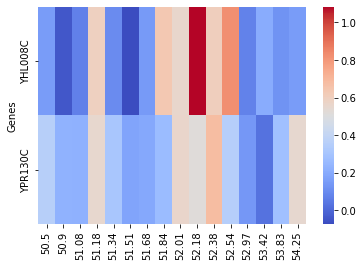

In [29]:
#heatmap of genes with high corr-SAM vector
#dfv2=dfv.loc[~(dfv==0).all(axis=1)]
pv_norm_me=lp_me.apply(lambda x: (x-x.mean())/x.std(), axis = 1) #normalizacion
ax=sns.heatmap(pv_norm_me.iloc[:,0:16], cmap=sns.color_palette("coolwarm", as_cmap=True)
)

plt.savefig("SAM_H3K4me3.pdf")

In [27]:
#Names of genes with high corr y low pvalue:
for index,valor in lp_me["pvalue"].items():
    print(index) 

YHL008C
YPR130C
